In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Setting path to import Csv files.
auto_insurance_to_load = Path("Resources/AutoInsurance.csv")
car_insurance_claim_to_load = Path("Resources/Car_Insurance_Claim.csv")
insurance_claims_to_load = Path("Resources/insurance_claims.csv")

# Reading CSV files and transforming into Dataframe.
auto_insurance_df = pd.read_csv(auto_insurance_to_load)
big_car_insurance_claim_df = pd.read_csv(car_insurance_claim_to_load)
big_insurance_claims_df = pd.read_csv(insurance_claims_to_load)



In [2]:
unclean_auto_df =  auto_insurance_df[[
                            "State",
                            "Coverage",
                            "Education",
                            "EmploymentStatus",
                            "Income",
                            "Monthly Premium Auto",
                            "Months Since Policy Inception",
                            "Marital Status",
                            "Location Code",
                            "Policy Type",
                            "Total Claim Amount",
                            "Vehicle Class", 
                            "Vehicle Size"
                            ]]

auto_df = unclean_auto_df.drop(index=0)

auto_df.head()

,State,Coverage,Education,EmploymentStatus,Income,Monthly Premium Auto,Months Since Policy Inception,Marital Status,Location Code,Policy Type,Total Claim Amount,Vehicle Class,Vehicle Size
1,Washington,Basic,Bachelor,Employed,56274,69,5,Married,Suburban,Corporate Auto,384.811147,Two-Door Car,Medsize
2,Arizona,Extended,Bachelor,Unemployed,0,94,42,Single,Suburban,Personal Auto,1131.464935,Four-Door Car,Medsize
3,Nevada,Premium,Bachelor,Employed,48767,108,38,Married,Suburban,Personal Auto,566.472247,Two-Door Car,Medsize
4,California,Basic,Bachelor,Unemployed,0,106,65,Married,Suburban,Corporate Auto,529.881344,SUV,Medsize
5,Washington,Basic,Bachelor,Employed,43836,73,44,Single,Rural,Personal Auto,138.130879,Four-Door Car,Medsize


In [3]:
insurance_claims_df = big_insurance_claims_df[["months_as_customer",
                                               "age",
                                               "policy_state",
                                               "policy_deductable",
                                               "policy_annual_premium",
                                               "insured_education_level",
                                               "total_claim_amount",
                                               "incident_severity",
                                               "auto_year"
                                               ]]

insurance_claims_df

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_education_level,total_claim_amount,incident_severity,auto_year
0,328,48,OH,1000,1406.91,MD,71610,Major Damage,2004
1,228,42,IN,2000,1197.22,MD,5070,Minor Damage,2007
2,134,29,OH,2000,1413.14,PhD,34650,Minor Damage,2007
3,256,41,IL,2000,1415.74,PhD,63400,Major Damage,2014
4,228,44,IL,1000,1583.91,Associate,6500,Minor Damage,2009
...,...,...,...,...,...,...,...,...,...
995,3,38,OH,1000,1310.80,Masters,87200,Minor Damage,2006
996,285,41,IL,1000,1436.79,PhD,108480,Major Damage,2015
997,130,34,OH,500,1383.49,Masters,67500,Minor Damage,1996
998,458,62,IL,2000,1356.92,Associate,46980,Major Damage,1998


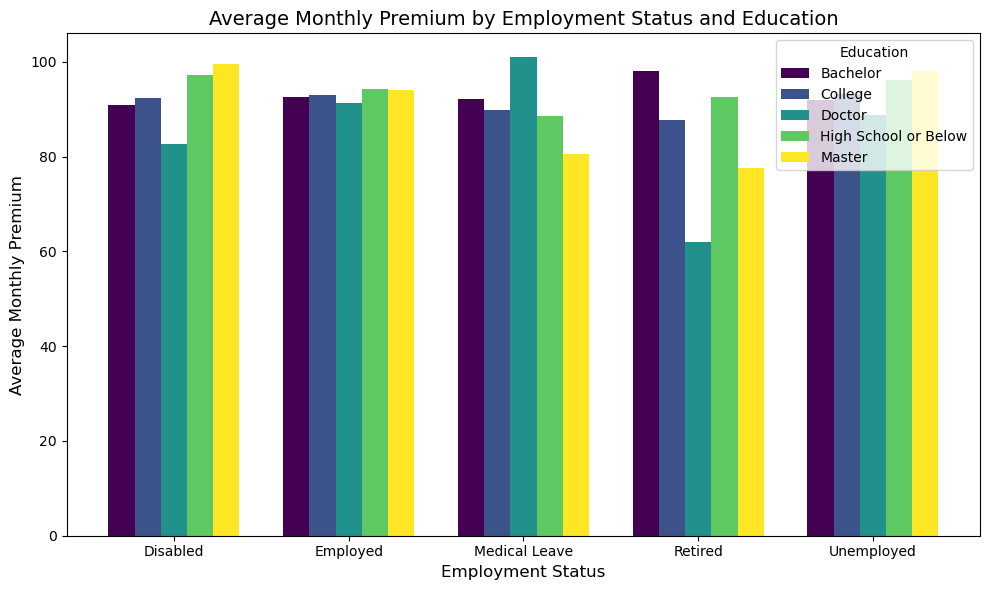

In [4]:

# Grouping the data by EmploymentStatus and Education, and calculating mean Monthly Premium Auto
grouped_df = auto_df.groupby(['EmploymentStatus', 'Education'])['Monthly Premium Auto'].mean().reset_index()

# We need to pivot 'grouped_df' to get 'Education' as columns.
pivot_df = grouped_df.pivot(index='EmploymentStatus', columns='Education', values='Monthly Premium Auto')

# Now we'll create a bar chart with the pivoted data.
bar_width = 0.15  # Width of the bars
index = np.arange(len(pivot_df.index))  # Array with the number of bars per group
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar for each 'Education' category.
colors = plt.cm.viridis(np.linspace(0, 1, len(pivot_df.columns)))  # Generate colors for each 'Education' category
for i, (column, color) in enumerate(zip(pivot_df.columns, colors)):
    ax.bar(index + i * bar_width, pivot_df[column], bar_width, label=column, color=color)

# Add labels and title.
ax.set_xlabel('Employment Status', fontsize=12)
ax.set_ylabel('Average Monthly Premium', fontsize=12)
ax.set_title('Average Monthly Premium by Employment Status and Education', fontsize=14)
ax.set_xticks(index + bar_width / 2 * (len(pivot_df.columns) - 1))
ax.set_xticklabels(pivot_df.index)

# Adding the legend and making it look nice.
ax.legend(title='Education')

# Show the plot.
plt.tight_layout()
plt.savefig("Output/Monthly Premium by Employment and Education.png")
plt.show()


WRITTEN ANALYSIS

Above graph shows the relationship between Employment status and Education with monthly premium. People with a Doctors, Bachelors or a Masters degree seem to be having a higher premium irrespective of the employment status. Of all the categories, people in the retired group have slightly lesser premium whereas people who are employed seem to be paying a consistent amount as monthly premium for all education levels. 

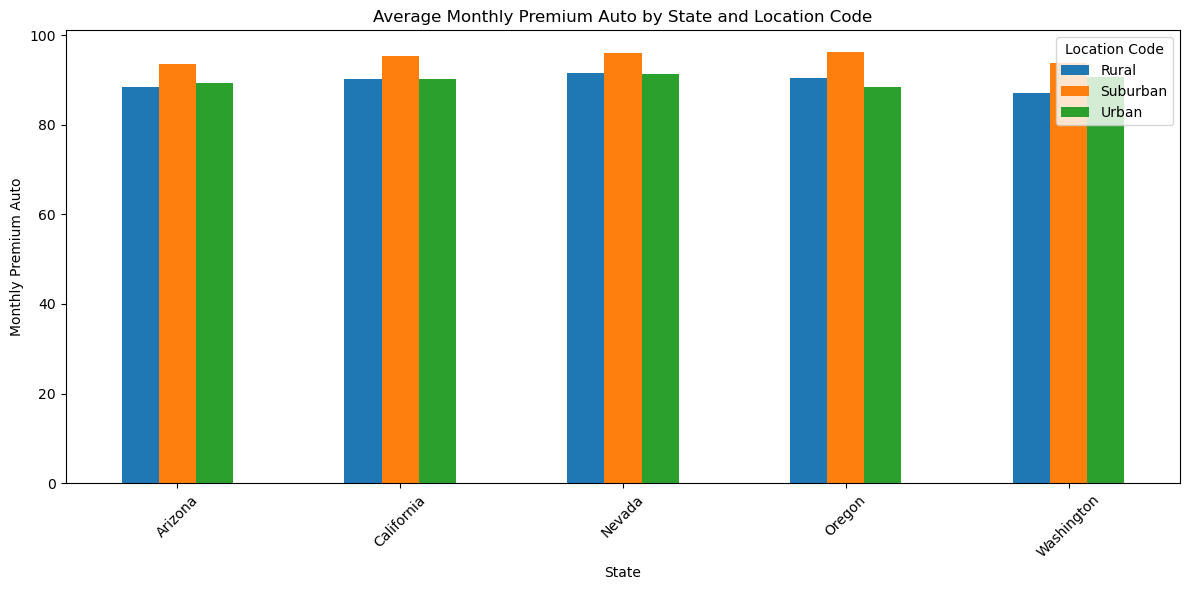

In [5]:

# Grouping data by "State" and "Policy Type," and calculating the mean of "Monthly Premium Auto"
state_policy_premium_mean = auto_df.groupby(["State", "Location Code"])["Monthly Premium Auto"].mean()

# Reshaping the data into a pivot table
state_policy_premium_pivot = state_policy_premium_mean.unstack()

# Creating the bar chart
plt.figure(figsize=(12, 6))
state_policy_premium_pivot.plot(kind="bar", ax=plt.gca())
plt.xlabel("State")
plt.ylabel("Monthly Premium Auto")
plt.title("Average Monthly Premium Auto by State and Location Code")
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("Output/Monthly Premium by State and Location code.png")
plt.show()


<H3>WRITTEN ANALYSIS</H3>

Above graph shows the relationship between state and location code against monthly premium for 5 different states namely AZ, CA, NV, OR, WA. Though the monthly premium seems to be more or less similar across all states, people living in sub-urban neighbourhoods pay a higher premium than the people living in rural and urban neighbourhoods. This can be accounted to the fact that people living in sub-urban neighbourhoods may have to drive to urban areas of the city for their work, other purposes etc.
